# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
#from colorspacious import cspace_converter
#from collections import OrderedDict
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

#set date
date = time.strftime("%d/%m/%Y")
date

'14/05/2023'

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | farasan
Processing Record 2 of Set 1 | ormara
Processing Record 3 of Set 1 | carnarvon
Processing Record 4 of Set 1 | rongelap
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | tura
Processing Record 8 of Set 1 | west island
Processing Record 9 of Set 1 | mayo-belwa
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | kailua-kona
Processing Record 13 of Set 1 | yuzhno-kurilsk
Processing Record 14 of Set 1 | lihue
Processing Record 15 of Set 1 | broome
Processing Record 16 of Set 1 | utrik
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | brookings
Processing Record 19 of Set 1 | lampa
Processing Record 20 of Set 1 | badger
Processing Record 21 of Set 1 | iqaluit
Processing Record 22 of Set 1 | bethel
Processing Record 23 of Set 1 | ghada

Processing Record 37 of Set 4 | goure
Processing Record 38 of Set 4 | tamandare
Processing Record 39 of Set 4 | lambarene
Processing Record 40 of Set 4 | thompson
Processing Record 41 of Set 4 | burang
Processing Record 42 of Set 4 | nedryhayliv
Processing Record 43 of Set 4 | udachny
Processing Record 44 of Set 4 | pathein
Processing Record 45 of Set 4 | lakatoro
Processing Record 46 of Set 4 | beau vallon
Processing Record 47 of Set 4 | christchurch
Processing Record 48 of Set 4 | nizhniy kuranakh
Processing Record 49 of Set 4 | rio grande
Processing Record 0 of Set 5 | ilulissat
Processing Record 1 of Set 5 | el nido
Processing Record 2 of Set 5 | richards bay
Processing Record 3 of Set 5 | jolo
Processing Record 4 of Set 5 | buenaventura
Processing Record 5 of Set 5 | hawaiian paradise park
Processing Record 6 of Set 5 | sao jose da coroa grande
Processing Record 7 of Set 5 | olyokminsk
Processing Record 8 of Set 5 | rosario oeste
Processing Record 9 of Set 5 | saldanha
Processing 

Processing Record 27 of Set 8 | torghay
Processing Record 28 of Set 8 | bodo
Processing Record 29 of Set 8 | kerikeri
Processing Record 30 of Set 8 | uren'
Processing Record 31 of Set 8 | howrah
Processing Record 32 of Set 8 | amos
Processing Record 33 of Set 8 | ambikapur
Processing Record 34 of Set 8 | paungde
Processing Record 35 of Set 8 | malanje
Processing Record 36 of Set 8 | alaghsas
Processing Record 37 of Set 8 | betio village
Processing Record 38 of Set 8 | sompeta
Processing Record 39 of Set 8 | itaituba
Processing Record 40 of Set 8 | dhalie
Processing Record 41 of Set 8 | callao
Processing Record 42 of Set 8 | kodok
City not found. Skipping...
Processing Record 43 of Set 8 | mineiros
Processing Record 44 of Set 8 | nizhneudinsk
Processing Record 45 of Set 8 | buka
Processing Record 46 of Set 8 | lejanias
Processing Record 47 of Set 8 | inari
Processing Record 48 of Set 8 | carloforte
Processing Record 49 of Set 8 | ghazieh
City not found. Skipping...
Processing Record 0 o

Processing Record 17 of Set 12 | bintulu
Processing Record 18 of Set 12 | ola
Processing Record 19 of Set 12 | fayzabad
Processing Record 20 of Set 12 | malango
Processing Record 21 of Set 12 | whitefish
Processing Record 22 of Set 12 | morehead city
Processing Record 23 of Set 12 | nyagan
Processing Record 24 of Set 12 | pleasanton
Processing Record 25 of Set 12 | gumdag
Processing Record 26 of Set 12 | nyaunglebin
Processing Record 27 of Set 12 | tralee
Processing Record 28 of Set 12 | kuanda
Processing Record 29 of Set 12 | naze
Processing Record 30 of Set 12 | fauske
Processing Record 31 of Set 12 | ulladulla
Processing Record 32 of Set 12 | yarmouth
Processing Record 33 of Set 12 | ta`u
Processing Record 34 of Set 12 | matoury
Processing Record 35 of Set 12 | chegdomyn
Processing Record 36 of Set 12 | at taj
Processing Record 37 of Set 12 | isna
Processing Record 38 of Set 12 | illizi
Processing Record 39 of Set 12 | kristiansund
Processing Record 40 of Set 12 | bat khela
Processi

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,farasan,16.7022,42.1183,30.33,74,0,4.42,SA,1684034372
1,ormara,25.2088,64.6357,28.21,85,0,4.69,PK,1684034372
2,carnarvon,-24.8667,113.6333,21.25,45,34,6.95,AU,1684034373
3,rongelap,11.1635,166.8941,27.85,79,23,6.89,MH,1684034373
4,blackmans bay,-43.0167,147.3167,15.07,59,83,1.91,AU,1684034373


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,farasan,16.7022,42.1183,30.33,74,0,4.42,SA,1684034372
1,ormara,25.2088,64.6357,28.21,85,0,4.69,PK,1684034372
2,carnarvon,-24.8667,113.6333,21.25,45,34,6.95,AU,1684034373
3,rongelap,11.1635,166.8941,27.85,79,23,6.89,MH,1684034373
4,blackmans bay,-43.0167,147.3167,15.07,59,83,1.91,AU,1684034373


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

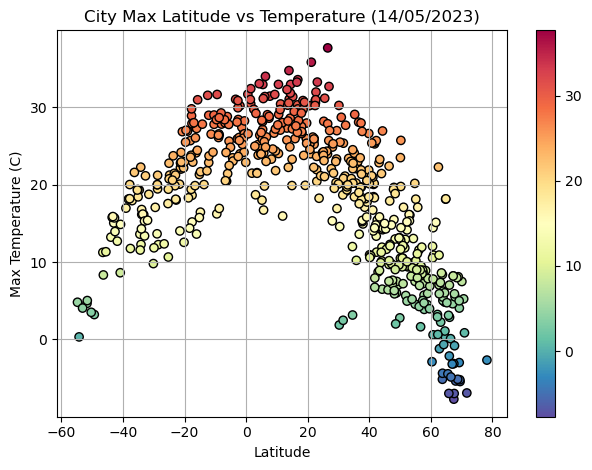

In [81]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],marker ="o", c = city_data_df["Max Temp"], edgecolors ="black",cmap = "Spectral_r")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
plt.colorbar()
plt.tight_layout()

# Save the figure
plt.savefig("..\output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

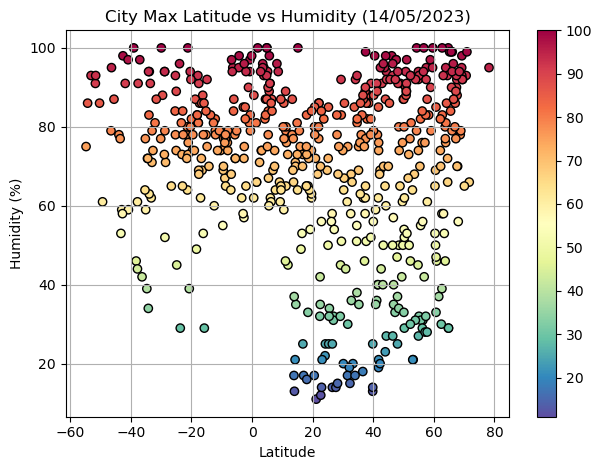

In [85]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],marker ="o", c = city_data_df["Humidity"], edgecolors ="black",cmap = "Spectral_r")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.colorbar()
plt.tight_layout()

# Save the figure
plt.savefig("..\output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

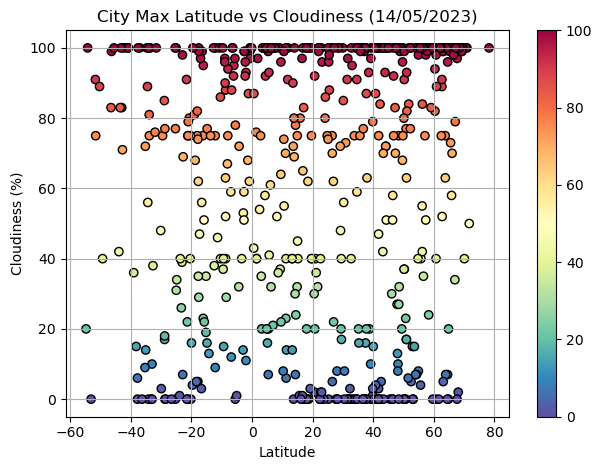

In [86]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],marker ="o", c = city_data_df["Cloudiness"], edgecolors ="black",cmap = "Spectral_r")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.colorbar()
plt.tight_layout()

# Save the figure
plt.savefig("..\output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

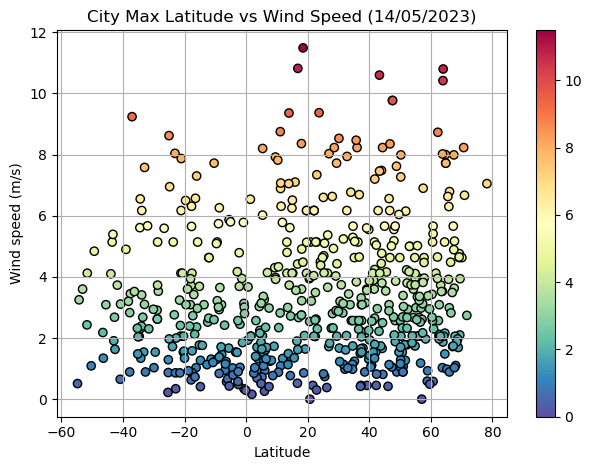

In [87]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],marker ="o", c = city_data_df["Wind Speed"], edgecolors ="black",cmap = "Spectral_r")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind speed (m/s)")
plt.grid(True)
plt.colorbar()
plt.tight_layout()

# Save the figure
plt.savefig("..\output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [157]:
# Define a function to create Linear Regression plots
x_values = [1,2,3]
y_values = [1,2,3]
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
def JRSfunc(x_values):
    return slope * x_values + intercept
regress_values = list(map(JRSfunc, x_values))

In [158]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,farasan,16.7022,42.1183,30.33,74,0,4.42,SA,1684034372
1,ormara,25.2088,64.6357,28.21,85,0,4.69,PK,1684034372
3,rongelap,11.1635,166.8941,27.85,79,23,6.89,MH,1684034373
6,tura,25.5198,90.2201,31.19,34,88,0.74,IN,1684034373
8,mayo-belwa,9.0500,12.0500,26.68,66,100,1.73,NG,1684034374


In [159]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,carnarvon,-24.8667,113.6333,21.25,45,34,6.95,AU,1684034373
4,blackmans bay,-43.0167,147.3167,15.07,59,83,1.91,AU,1684034373
5,waitangi,-43.9535,-176.5597,13.23,78,42,4.10,NZ,1684034373
7,west island,-12.1568,96.8225,28.99,79,75,4.63,CC,1684034374
9,port-aux-francais,-49.3500,70.2167,3.22,61,40,4.84,TF,1684034374


###  Temperature vs. Latitude Linear Regression Plot

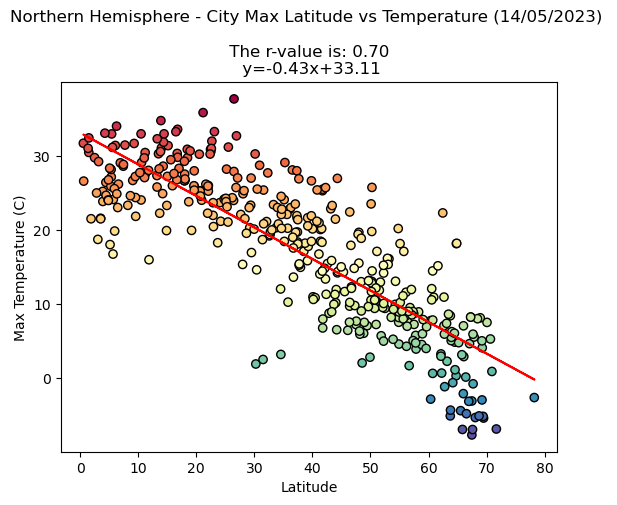

In [160]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
x_axis_label = "Latitude"
y_values = northern_hemi_df["Max Temp"]
y_axis_label = "Max Temperature (C)"

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
def JRSfunc(x_values):
    return slope * x_values + intercept
regression_line = list(map(JRSfunc, x_values))

title = f"Northern Hemisphere - City Max Latitude vs Temperature ({date}) \n \n The r-value is: {rvalue**2:.2f} \n y={slope:.2f}x+{intercept:.2f}"
                      
# Incorporate the scatterplot
plt.scatter(x_values,y_values,marker ="o", c = y_values, edgecolors ="black",cmap = "Spectral_r")
plt.plot(x_values,regression_line,"r-")
plt.title(title)
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)

plt.savefig("..\output_data/NH TvL.png",bbox_inches='tight',dpi=100)

plt.show()

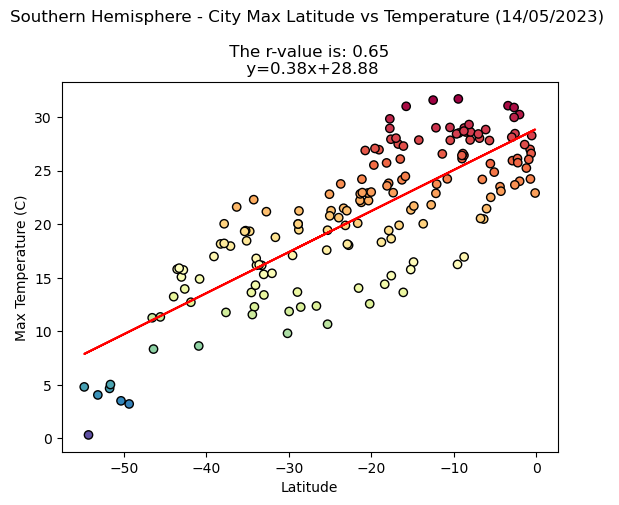

In [161]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
x_axis_label = "Latitude"
y_values = southern_hemi_df["Max Temp"]
y_axis_label = "Max Temperature (C)"

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
def JRSfunc(x_values):
    return slope * x_values + intercept
regression_line = list(map(JRSfunc, x_values))

title = f"Southern Hemisphere - City Max Latitude vs Temperature ({date}) \n \n The r-value is: {rvalue**2:.2f} \n y={slope:.2f}x+{intercept:.2f}"

# Incorporate the scatterplot & regression line
plt.scatter(x_values,y_values, marker ="o", c = y_values, edgecolors ="black",cmap = "Spectral_r")
plt.plot(x_values,regression_line,"r-")
plt.title(title)
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)

plt.savefig("..\output_data/SH TvL.png",bbox_inches='tight',dpi=100)

plt.show()

**Discussion about the linear relationship:** The correlation between the temperature being cooler the further you are from the equator is strong.

### Humidity vs. Latitude Linear Regression Plot

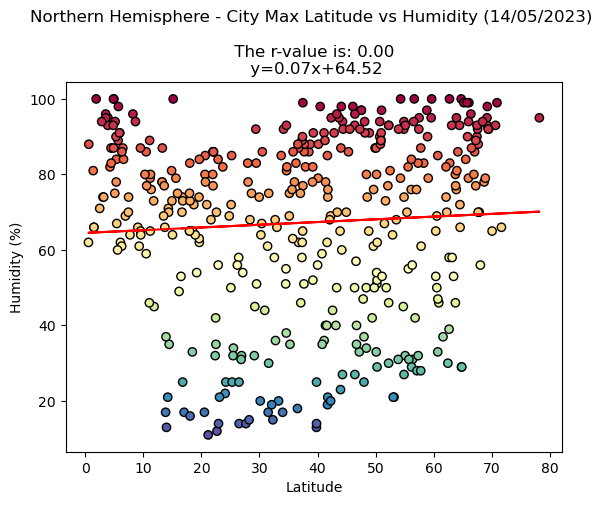

In [162]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
x_axis_label = "Latitude"
y_values = northern_hemi_df["Humidity"]
y_axis_label = "Humidity (%)"

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
def JRSfunc(x_values):
    return slope * x_values + intercept
regression_line = list(map(JRSfunc, x_values))

title = f"Northern Hemisphere - City Max Latitude vs Humidity ({date}) \n \n The r-value is: {rvalue**2:.2f} \n y={slope:.2f}x+{intercept:.2f}"

# Incorporate the scatterplot
plt.scatter(x_values,y_values, marker ="o", c = y_values, edgecolors ="black",cmap = "Spectral_r")
plt.plot(x_values,regression_line,"r-")
plt.title(title)
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)

plt.savefig("..\output_data/NH HvL.png",bbox_inches='tight',dpi=100)

plt.show()

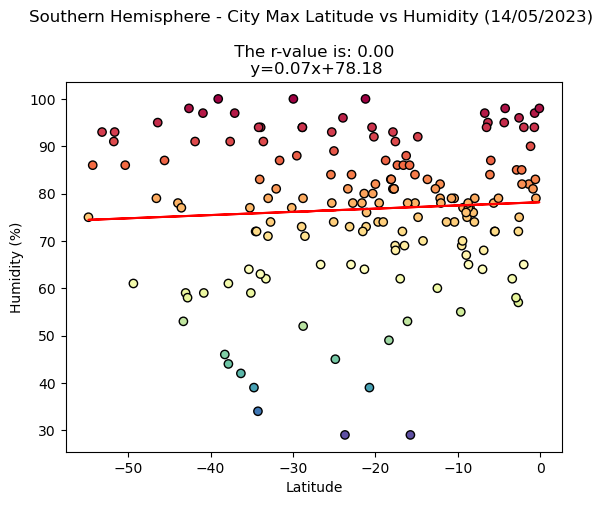

In [163]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
x_axis_label = "Latitude"
y_values = southern_hemi_df["Humidity"]
y_axis_label = "Humidity (%)"

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
def JRSfunc(x_values):
    return slope * x_values + intercept
regression_line = list(map(JRSfunc, x_values))

title = f"Southern Hemisphere - City Max Latitude vs Humidity ({date}) \n \n The r-value is: {rvalue**2:.2f} \n y={slope:.2f}x+{intercept:.2f}"

# Incorporate the scatterplot
plt.scatter(x_values,y_values, marker ="o", c = y_values, edgecolors ="black",cmap = "Spectral_r")
plt.plot(x_values,regression_line,"r-")
plt.title(title)
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)

plt.savefig("..\output_data/SH HvL.png",bbox_inches='tight',dpi=100)

plt.show()

**Discussion about the linear relationship:** There is no correlation between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

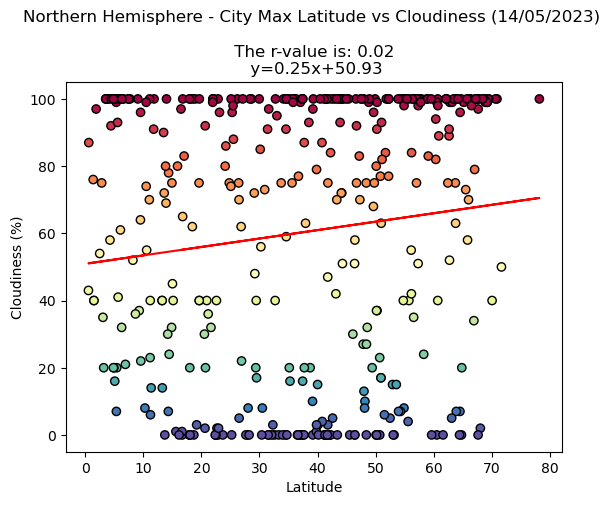

In [164]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
x_axis_label = "Latitude"
y_values = northern_hemi_df["Cloudiness"]
y_axis_label = "Cloudiness (%)"

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
def JRSfunc(x_values):
    return slope * x_values + intercept
regression_line = list(map(JRSfunc, x_values))

title = f"Northern Hemisphere - City Max Latitude vs Cloudiness ({date}) \n \n The r-value is: {rvalue**2:.2f} \n y={slope:.2f}x+{intercept:.2f}"

# Incorporate the scatterplot
plt.scatter(x_values,y_values, marker ="o", c = y_values, edgecolors ="black",cmap = "Spectral_r")
plt.plot(x_values,regression_line,"r-")
plt.title(title)
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)

plt.savefig("..\output_data/NH CvL.png",bbox_inches='tight',dpi=100)

plt.show()

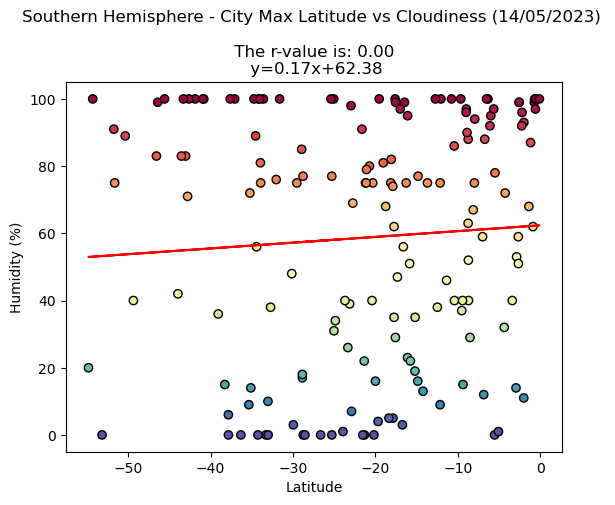

In [165]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
x_axis_label = "Latitude"
y_values = southern_hemi_df["Cloudiness"]
y_axis_label = "Humidity (%)"

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
def JRSfunc(x_values):
    return slope * x_values + intercept
regression_line = list(map(JRSfunc, x_values))

title = f"Southern Hemisphere - City Max Latitude vs Cloudiness ({date}) \n \n The r-value is: {rvalue**2:.2f} \n y={slope:.2f}x+{intercept:.2f}"

# Incorporate the scatterplot
plt.scatter(x_values,y_values, marker ="o", c = y_values, edgecolors ="black",cmap = "Spectral_r")
plt.plot(x_values,regression_line,"r-")
plt.title(title)
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)

plt.savefig("..\output_data/SH CvL.png",bbox_inches='tight',dpi=100)

plt.show()

**Discussion about the linear relationship:** There is no correlation between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

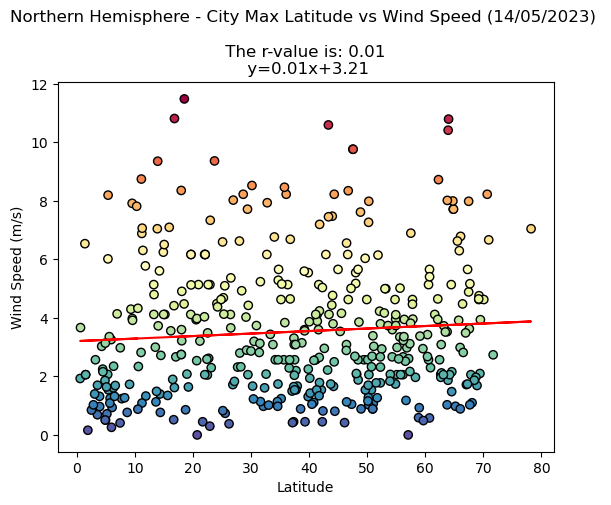

In [166]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
x_axis_label = "Latitude"
y_values = northern_hemi_df["Wind Speed"]
y_axis_label = "Wind Speed (m/s)"

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
def JRSfunc(x_values):
    return slope * x_values + intercept
regression_line = list(map(JRSfunc, x_values))

title = f"Northern Hemisphere - City Max Latitude vs Wind Speed ({date}) \n \n The r-value is: {rvalue**2:.2f} \n y={slope:.2f}x+{intercept:.2f}"

# Incorporate the scatterplot
plt.scatter(x_values,y_values, marker ="o", c = y_values, edgecolors ="black",cmap = "Spectral_r")
plt.plot(x_values,regression_line,"r-")
plt.title(title)
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)

plt.savefig("..\output_data/NH WvL.png",bbox_inches='tight',dpi=100)

plt.show()

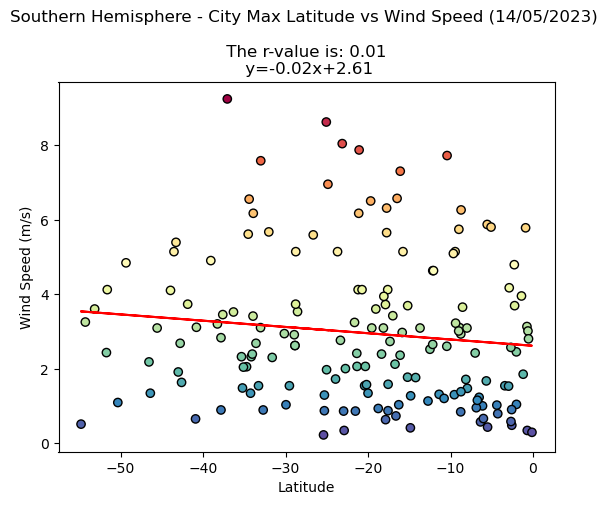

In [167]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
x_axis_label = "Latitude"
y_values = southern_hemi_df["Wind Speed"]
y_axis_label = "Wind Speed (m/s)"

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
def JRSfunc(x_values):
    return slope * x_values + intercept
regression_line = list(map(JRSfunc, x_values))

title = f"Southern Hemisphere - City Max Latitude vs Wind Speed ({date}) \n \n The r-value is: {rvalue**2:.2f} \n y={slope:.2f}x+{intercept:.2f}"

# Incorporate the scatterplot
plt.scatter(x_values,y_values, marker ="o", c = y_values, edgecolors ="black",cmap = "Spectral_r")
plt.plot(x_values,regression_line,"r-")
plt.title(title)
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)

plt.savefig("..\output_data/SH WvL.png",bbox_inches='tight',dpi=100)

plt.show()

**Discussion about the linear relationship:** There is no correlation between wind speed and latitude.